In [1]:
import pandas as pdf
import base64
import requests
import cv2
import urllib
import matplotlib.pyplot as plt
import numpy as np
df = pdf.read_csv('All Images URL - Sheet1.csv').head(100)

In [2]:
df['Image URL'].iloc[3]

'https://cdn.cliqstock.com/assets/contributor/watermark/2021/11/16/thumb_61933f2a4831c1637039914.jpg'

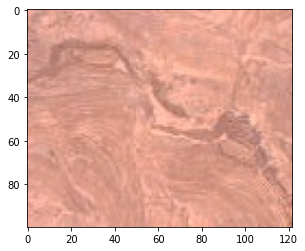

In [3]:
img = cv2.imread('/home/ruchika/Downloads/dee.jpeg')
sample =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(sample)


In [4]:
def bfmatch(path1,path2):
    try:
        gray_img1 = cv2.cvtColor(path1,cv2.COLOR_BGR2GRAY)
        gray_img2 = cv2.cvtColor(path2,cv2.COLOR_BGR2GRAY)
        detect = cv2.ORB_create()
        key_point1,descrip1 = detect.detectAndCompute(gray_img1,None)
        key_point2,descrip2 = detect.detectAndCompute(gray_img2,None)
        brute_force = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
        no_of_matches = brute_force.match(descrip1,descrip2)
        no_of_matches = sorted(no_of_matches,key=lambda x:x.distance)
        return no_of_matches
    except:
        pass

In [5]:
import base64
import requests
import cv2
import urllib
import numpy as np

mat = []
imag = []
l = list(df.index.values)
for i in l:
    try:
        b = df['Image URL'].iloc[i]
        im = df['image_thumb'].iloc[i]
        req = urllib.request.urlopen(b)
        arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
        img2 = cv2.imdecode(arr, -1) # 'Load it as it is'
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        match = bfmatch(sample,img2)
        
        n_match = len(match)
        mat.append(n_match)
        imag.append(b)
    except:
        pass

In [6]:
df2 = pdf.DataFrame()
df2['images'] = imag
df2['matches'] = mat
print(df2)


                                               images  matches
0   https://cdn.cliqstock.com/assets/contributor/w...       33
1   https://cdn.cliqstock.com/assets/contributor/w...       39
2   https://cdn.cliqstock.com/assets/contributor/w...        3
3   https://cdn.cliqstock.com/assets/contributor/w...       32
4   https://cdn.cliqstock.com/assets/contributor/w...       30
..                                                ...      ...
75  https://cdn.cliqstock.com/assets/contributor/w...        2
76  https://cdn.cliqstock.com/assets/contributor/w...       37
77  https://cdn.cliqstock.com/assets/contributor/w...        6
78  https://cdn.cliqstock.com/assets/contributor/w...       37
79  https://cdn.cliqstock.com/assets/contributor/w...       36

[80 rows x 2 columns]


In [7]:
test = df2.sort_values('matches', ascending=False)
print(test)
final = test.head(1)
final = final[final.matches >= 40]
#final =final(max(test))
final
if final.empty:
    pass
    

                                               images  matches
30  https://cdn.cliqstock.com/assets/contributor/w...       41
61  https://cdn.cliqstock.com/assets/contributor/w...       41
28  https://cdn.cliqstock.com/assets/contributor/w...       40
18  https://cdn.cliqstock.com/assets/contributor/w...       40
1   https://cdn.cliqstock.com/assets/contributor/w...       39
..                                                ...      ...
26  https://cdn.cliqstock.com/assets/contributor/w...        2
35  https://cdn.cliqstock.com/assets/contributor/w...        2
63  https://cdn.cliqstock.com/assets/contributor/w...        1
73  https://cdn.cliqstock.com/assets/contributor/w...        1
20  https://cdn.cliqstock.com/assets/contributor/w...        1

[80 rows x 2 columns]


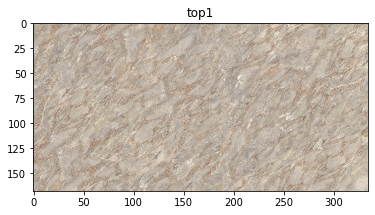

In [8]:
n = 0
for i , r in final.iterrows():
    try:
        b = r['images']
        req = urllib.request.urlopen(b)
        arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    
        img2 = cv2.imdecode(arr, -1)
        img2 =cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        plt.figure()
        n +=1
        plt.title(f'top{n}')
        plt.imshow(img2)
    except:
        break